## Estimation of number of minimum required landmark

**Date** : 2021-10-05<br>
**Author** : Alma Andersson<br>
**Description** : <br>

This notebook outlines our analysis to estimate the minimum number of required landmarks in each data set. We sometimes choose to chart more landmarks than the lower bound. There are two main reasons for this: (i) spatial symmetries, when samples posses internal symmetry identification of $N$ suitable landmarks in one part of this symmetric structure, we immediately have $2N$ landmark in the whole tissue; (ii) sometimes the landmarks are hard to pin-point exactly, and we thus attempt to correct for eventual errors by introducing more landmarks, making the transfer less dependent on the correctness of each landmark.

Load the necessary packages

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scanpy as sc

import os.path as osp
import os
from PIL import Image

import anndata as ad
import pandas as pd
import sys

import eggplant as eg


In [2]:
PLOT_RES_DIR = "../../res/analysis/n-lmk-evaluation"
DATA_RES_DIR = "../../res/references/vars/est-lmk"

SAVE_MODE = True
N_REPS = 5
N_EVALS = 5
N_MIN_LMK = 1
N_MAX_LMK = 20

## Synthetic Data

In [3]:
sample_name = "synthetic"

In [4]:
SYNTH_PTH = "../data/synthetic/curated/t_7.h5ad"
adata = ad.read_h5ad(SYNTH_PTH)

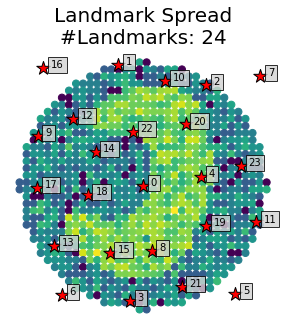

In [5]:
eg.pl.visualize_landmark_spread(adata,
                                spread_distance = 130,
                                marker_size = 50,
                                landmark_marker_size = 200,
                               )
plt.show()

In [ ]:
syn_res = eg.fun.estimate_n_lanmdarks(dict(synhteic_t7 = adata),
                                  n_max_lmks=N_MAX_LMK,
                                  n_min_lmks = N_MIN_LMK,
                                  n_reps = N_REPS,
                                  subsample = None,
                                  n_epochs=1000,
                                  n_evals=N_EVALS,
                                  device="gpu",
                                  verbose = True,
                                  spread_distance = 130,
                                 )

[Processing] :: Sample : synhteic_t7 (1/1)


Eval: 1 lmks | Rep: 1/5:   0%|                                                                                  | 0/1000 [00:00<?, ?it/s]/home/alma.andersson/miniconda3/envs/eggplant/lib/python3.8/site-packages/gpytorch-1.5.0-py3.8.egg/gpytorch/utils/linear_cg.py:266: UserWarning: An output with one or more elements was resized since it had shape [11], which does not match the required output shape [1, 11].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  _jit_linear_cg_updates_no_precond(
Eval: 1 lmks | Rep: 1/5: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.41it/s]
Eval: 1 lmks | Rep: 2/5: 100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00,

In [ ]:
import torch as t
t.cuda.empty_cache()

In [ ]:
fig,ax = eg.pl.landmark_diagnostics(syn_res,return_figure = True)

In [ ]:
lower_bound = 10
fig,ax = eg.pl.landmark_diagnostics(syn_res,return_figure = True, lower_bound=lower_bound)

if SAVE_MODE:
    fig.savefig(osp.join(PLOT_RES_DIR,"est-lmk-{}.png".format(sample_name)),
                bbox_inches = "tight")
    with open(osp.join(DATA_RES_DIR,"est-lmk-{}".format(sample_name)),"w+") as f:
        f.write(str(lower_bound))

### MOB (Mouse Olfactory Bulb)

In [ ]:
sample_name = "mob"

In [ ]:
MOB_PTH = "../data/mob/charted/Rep1_MOB.h5ad"

In [ ]:
adata = ad.read_h5ad(MOB_PTH)

In [ ]:
eg.pl.visualize_landmark_spread(adata,
                                center_to_center_multiplier = 1.5,
                                marker_size = 140,
                                landmark_marker_size = 350,
                               )
plt.show()

In [ ]:
mob_res = eg.fun.estimate_n_lanmdarks(dict(Rep1_MOB = adata),
                                  n_max_lmks=N_MAX_LMK,
                                  n_min_lmks = N_MIN_LMK,
                                  n_reps = N_REPS,
                                  subsample = None,
                                  n_epochs=1000,
                                  n_evals=N_EVALS,
                                  device="gpu",
                                  verbose = True,
                                  center_to_center_multiplier = 1.5,
                                 )

In [ ]:
fig,ax = eg.pl.landmark_diagnostics(mob_res,return_figure = True)

In [ ]:
lower_bound = 5
fig,ax = eg.pl.landmark_diagnostics(mob_res,return_figure = True,lower_bound=lower_bound)
if SAVE_MODE:
    fig.savefig(osp.join(PLOT_RES_DIR,"est-lmk-{}.png".format(sample_name)),
                bbox_inches = "tight")
    with open(osp.join(DATA_RES_DIR,"est-lmk-{}".format(sample_name)),"w+") as f:
        f.write(str(lower_bound))

## Heart Data

In [ ]:
HEART_PTH = "../data/human-developmental-heart/curated/V10F24-105_A1.h5ad"
adata = ad.read_h5ad(HEART_PTH)


In [ ]:
eg.pl.visualize_landmark_spread(adata,
                                center_to_center_multiplier = 8,
                                marker_size = 10,
                                landmark_marker_size = 150,
                               )
plt.show()

In [ ]:
hrt_res = eg.fun.estimate_n_lanmdarks(dict(dhA = adata),
                                      n_max_lmks=N_MAX_LMK,
                                      n_min_lmks = N_MIN_LMK,
                                      n_reps = N_REPS,
                                  subsample = None,
                                  n_epochs=1000,
                                  n_evals= N_EVALS,
                                  device="gpu",
                                  verbose = True,
                                  center_to_center_multiplier = 8,
                                 )

In [ ]:
fig,ax = eg.pl.landmark_diagnostics(hrt_res,return_figure = True)

In [ ]:
lower_bound = 5
fig,ax = eg.pl.landmark_diagnostics(hrt_res,return_figure = True,lower_bound=lower_bound)
if SAVE_MODE:
    fig.savefig(osp.join(PLOT_RES_DIR,"est-lmk-{}.png".format(sample_name)),
                bbox_inches = "tight")
    with open(osp.join(DATA_RES_DIR,"est-lmk-{}".format(sample_name)),"w+") as f:
        f.write(str(lower_bound))

## Mouse Hippocampus

In [ ]:
sample_name = "mouse-hippocampus"

In [ ]:
MOUSE_HIPPO_PATH = "../data/mouse-hippocampus/curated/hippo-visium.h5ad"
adata = ad.read_h5ad(MOUSE_HIPPO_PATH)

In [ ]:
eg.pl.visualize_landmark_spread(adata,
                                center_to_center_multiplier = 4.,
                                marker_size = 50,
                                landmark_marker_size = 350,
                               )
plt.show()

In [ ]:
hip_res = eg.fun.estimate_n_lanmdarks(dict(Mouse_Hippocampus = adata),
                                  n_max_lmks=N_MAX_LMK,
                                  n_min_lmks = N_MIN_LMK,
                                  n_reps = N_REPS,
                                  subsample = None,
                                  n_epochs=1000,
                                  n_evals=N_EVALS,
                                  device="gpu",
                                  verbose = True,
                                  center_to_center_multiplier = 4,
                                 )

In [ ]:
fig,ax = eg.pl.landmark_diagnostics(hip_res,return_figure=True)

In [ ]:
lower_bound = 15
fig,ax = eg.pl.landmark_diagnostics(hip_res,return_figure = True,lower_bound=lower_bound)
if SAVE_MODE:
    fig.savefig(osp.join(PLOT_RES_DIR,"est-lmk-{}.png".format(sample_name)),
                bbox_inches = "tight")
    with open(osp.join(DATA_RES_DIR,"est-lmk-{}".format(sample_name)),"w+") as f:
        f.write(str(lower_bound))

## Human Breast Cancer

In [ ]:
sample_name = "human-breast-cancer"

In [ ]:
HUMAN_BC_PATH = "../data/human-breast-cancer/curated/bcA.h5ad"
adata = ad.read_h5ad(HUMAN_BC_PATH)

In [ ]:
eg.pl.visualize_landmark_spread(adata,
                                center_to_center_multiplier = 9,
                                marker_size = 10,
                                landmark_marker_size = 350,
                               )
plt.show()

In [ ]:
bc_res = eg.fun.estimate_n_lanmdarks(dict(Human_Breast_Cancer = adata),
                                    n_max_lmks=N_MAX_LMK,
                                    n_min_lmks=N_MIN_LMK,
                                    n_reps=N_REPS,
                                    subsample = None,
                                    n_epochs=1000,
                                    n_evals=N_EVALS,
                                    device="gpu",
                                    verbose = True,
                                    center_to_center_multiplier=9,
                                    )


In [ ]:
fig,ax = eg.pl.landmark_diagnostics(bc_res,return_figure = True,lower_bound=lower_bound)


In [ ]:
lower_bound = 11
fig,ax = eg.pl.landmark_diagnostics(bc_res,return_figure = True,lower_bound=lower_bound)
if SAVE_MODE:
    fig.savefig(osp.join(PLOT_RES_DIR,"est-lmk-{}.png".format(sample_name)),
                bbox_inches = "tight")
    with open(osp.join(DATA_RES_DIR,"est-lmk-{}".format(sample_name)),"w+") as f:
        f.write(str(lower_bound))